# intro to ConvNets

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()
# h = (h + 2*p - f)/s + 1
# w = (w + 2*p - f)/s + 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) #28x28 => 28-3+1 => 26x26
model.add(MaxPooling2D())                       #26x26 => 13x13
model.add(Conv2D(64, (3,3), activation='relu')) #13x13 => 11x11
model.add(MaxPooling2D())                       #11x11 => 5x5
model.add(Conv2D(64, (3,3), activation='relu')) #5x5 => 3x3
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [8]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [9]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [11]:
x_train = x_train.astype('float32')/255
x_train = x_train.reshape((60000,28,28,1))
y_train = to_categorical(y_train)

x_test = x_test.astype('float32')/255
x_test = x_test.reshape((10000,28,28,1))
y_test = to_categorical(y_test)

In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 22s 363us/step - loss: 0.1684 - acc: 0.9476
Epoch 2/5
60000/60000 [==============================] - 21s 350us/step - loss: 0.0463 - acc: 0.9852
Epoch 3/5
60000/60000 [==============================] - 21s 349us/step - loss: 0.0328 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 21s 352us/step - loss: 0.0249 - acc: 0.9924
Epoch 5/5
60000/60000 [==============================] - 21s 350us/step - loss: 0.0202 - acc: 0.9938


In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 150us/step


[0.023439019007971, 0.9918]

# dogs vs cats 

### straight conv model

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_generator = train_datagen.flow_from_directory('../dogs-vs-cats/train/',
                                                    target_size=(150,150),class_mode='binary', batch_size=16)
val_generator = test_datagen.flow_from_directory('../dogs-vs-cats/validation/',
                                                    target_size=(150,150),class_mode='binary', batch_size=16)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras import backend as K

In [14]:
K.clear_session()

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import optimizers

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='binary_crossentropy',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [7]:
history = model.fit_generator(train_generator, steps_per_epoch=125, epochs=30, validation_data=val_generator, validation_steps=62)

Epoch 1/30
125/125 [==============================] - 71s 565ms/step - loss: 0.6914 - acc: 0.5140 - val_loss: 0.6925 - val_acc: 0.5080
Epoch 2/30
125/125 [==============================] - 13s 104ms/step - loss: 0.6641 - acc: 0.5885 - val_loss: 0.6270 - val_acc: 0.6460
Epoch 3/30
125/125 [==============================] - 13s 105ms/step - loss: 0.6068 - acc: 0.6730 - val_loss: 0.6318 - val_acc: 0.6290
Epoch 4/30
125/125 [==============================] - 13s 105ms/step - loss: 0.5458 - acc: 0.7110 - val_loss: 0.5660 - val_acc: 0.7070
Epoch 5/30
125/125 [==============================] - 13s 105ms/step - loss: 0.4943 - acc: 0.7565 - val_loss: 0.5812 - val_acc: 0.6820
Epoch 6/30
125/125 [==============================] - 13s 105ms/step - loss: 0.4495 - acc: 0.7870 - val_loss: 0.6110 - val_acc: 0.6900
Epoch 7/30
125/125 [==============================] - 13s 104ms/step - loss: 0.4172 - acc: 0.8085 - val_loss: 0.5583 - val_acc: 0.7250
Epoch 8/30
125/125 [==============================] - 1

In [19]:
model.save('./dogscats_first_run.h5')

In [11]:
import matplotlib.pyplot as plt

In [26]:
def plot_history(history):
    epochs = range(1, len(history['acc'])+1)

    plt.plot(epochs, history['acc'], 'bo', label='training acc')
    plt.plot(epochs, history['val_acc'], 'b', label='val acc')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, history['loss'], 'bo', label='training loss')
    plt.plot(epochs, history['val_loss'], 'b', label='val loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()

    plt.show()    

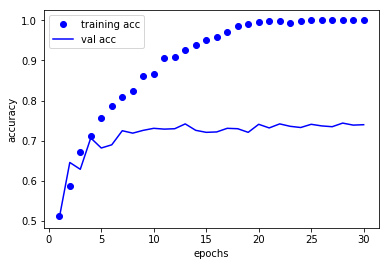

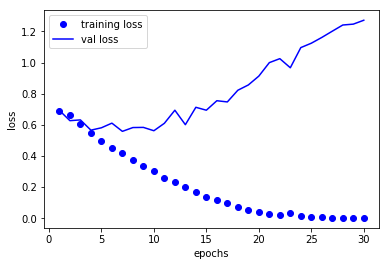

In [10]:
plot_history(history.history)

### data augmention

In [13]:
from keras.preprocessing import image
import os

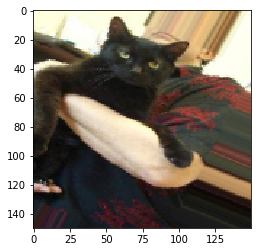

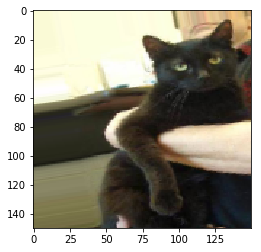

In [14]:
datagen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.3, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest')

fnames = [os.path.join('../dogs-vs-cats/train/cat/', f) for f in os.listdir('../dogs-vs-cats/train/cat/')]

img = image.load_img(fnames[42], target_size=(150,150))
x = image.img_to_array(img).reshape((1,150,150,3))

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplt = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 2 == 0:
        break

plt.show()

### regularized model

In [15]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   zoom_range=0.2, 
                                   shear_range=0.2, 
                                   rotation_range=50)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('../dogs-vs-cats/train/', 
                                                    target_size=(150,150),class_mode='binary', batch_size=32)
val_generator = test_datagen.flow_from_directory('../dogs-vs-cats/validation/', 
                                                    target_size=(150,150),class_mode='binary', batch_size=32)
#test_generator = test_datagen.flow_from_directory('../dogs-vs-cats/test/', 
#                                                    target_size=(150,150),class_mode='binary', batch_size=16)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
hist = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=val_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 32s 321ms/step - loss: 0.6909 - acc: 0.5216 - val_loss: 0.6808 - val_acc: 0.5730
Epoch 2/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6806 - acc: 0.5531 - val_loss: 0.6722 - val_acc: 0.5670
Epoch 3/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6696 - acc: 0.5847 - val_loss: 0.6813 - val_acc: 0.5680
Epoch 4/100
100/100 [==============================] - 29s 290ms/step - loss: 0.6484 - acc: 0.6197 - val_loss: 0.6215 - val_acc: 0.6420
Epoch 5/100
100/100 [==============================] - 29s 286ms/step - loss: 0.6213 - acc: 0.6519 - val_loss: 0.5910 - val_acc: 0.6710
Epoch 6/100
100/100 [==============================] - 31s 311ms/step - loss: 0.5907 - acc: 0.6816 - val_loss: 0.5632 - val_acc: 0.7020
Epoch 7/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6003 - acc: 0.6778 - val_loss: 0.5414 - val_acc: 0.7280
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 29s 287ms/step - loss: 0.3689 - acc: 0.8356 - val_loss: 0.4147 - val_acc: 0.8140
Epoch 62/100
100/100 [==============================] - 29s 294ms/step - loss: 0.3709 - acc: 0.8322 - val_loss: 0.4278 - val_acc: 0.8190
Epoch 63/100
100/100 [==============================] - 29s 286ms/step - loss: 0.3811 - acc: 0.8294 - val_loss: 0.4464 - val_acc: 0.8020
Epoch 64/100
100/100 [==============================] - 29s 288ms/step - loss: 0.3733 - acc: 0.8272 - val_loss: 0.3994 - val_acc: 0.8240
Epoch 65/100
100/100 [==============================] - 29s 287ms/step - loss: 0.3615 - acc: 0.8384 - val_loss: 0.4238 - val_acc: 0.8010
Epoch 66/100
100/100 [==============================] - 29s 287ms/step - loss: 0.3635 - acc: 0.8441 - val_loss: 0.4146 - val_acc: 0.8200
Epoch 67/100
100/100 [==============================] - 29s 290ms/step - loss: 0.3696 - acc: 0.8344 - val_loss: 0.4646 - val_acc: 0.8040
Epoch 68/100
100/100 [===================

In [ ]:
plot_history(hist.history)

In [38]:
model.save('dogscats_regularized.h5')

In [22]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3))) #148
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3))) #146
model.add(MaxPooling2D()) #73

model.add(Conv2D(64, (3,3), activation='relu')) #71
model.add(Conv2D(64, (3,3), activation='relu')) #68
model.add(MaxPooling2D()) #34

model.add(Conv2D(128, (3,3), activation='relu')) #32
model.add(Conv2D(128, (3,3), activation='relu')) #30
model.add(MaxPooling2D()) #15

model.add(Conv2D(256, (3,3), activation='relu')) #13
model.add(MaxPooling2D()) #6
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 146, 146, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)       73856     
__________

In [23]:
hist_custom=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=val_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 33s 325ms/step - loss: 0.6925 - acc: 0.5028 - val_loss: 0.6888 - val_acc: 0.5750
Epoch 2/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6873 - acc: 0.5562 - val_loss: 0.6661 - val_acc: 0.6100
Epoch 3/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6754 - acc: 0.5772 - val_loss: 0.6683 - val_acc: 0.5980
Epoch 4/100
100/100 [==============================] - 30s 296ms/step - loss: 0.6604 - acc: 0.6119 - val_loss: 0.6215 - val_acc: 0.6560
Epoch 5/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6302 - acc: 0.6369 - val_loss: 0.6767 - val_acc: 0.5840
Epoch 6/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6153 - acc: 0.6578 - val_loss: 0.5812 - val_acc: 0.7010
Epoch 7/100
100/100 [==============================] - 29s 289ms/step - loss: 0.6027 - acc: 0.6656 - val_loss: 0.5706 - val_acc: 0.7110
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 29s 290ms/step - loss: 0.3352 - acc: 0.8562 - val_loss: 0.5321 - val_acc: 0.7730
Epoch 62/100
100/100 [==============================] - 30s 302ms/step - loss: 0.3395 - acc: 0.8550 - val_loss: 0.4315 - val_acc: 0.8240
Epoch 63/100
100/100 [==============================] - 29s 289ms/step - loss: 0.3305 - acc: 0.8484 - val_loss: 0.4800 - val_acc: 0.7940
Epoch 64/100
100/100 [==============================] - 29s 291ms/step - loss: 0.3412 - acc: 0.8494 - val_loss: 0.5091 - val_acc: 0.7830
Epoch 65/100
100/100 [==============================] - 29s 288ms/step - loss: 0.3243 - acc: 0.8578 - val_loss: 0.3915 - val_acc: 0.8370
Epoch 66/100
100/100 [==============================] - 29s 289ms/step - loss: 0.3168 - acc: 0.8575 - val_loss: 0.3758 - val_acc: 0.8370
Epoch 67/100
100/100 [==============================] - 29s 294ms/step - loss: 0.3030 - acc: 0.8728 - val_loss: 0.4354 - val_acc: 0.8210
Epoch 68/100
100/100 [===================

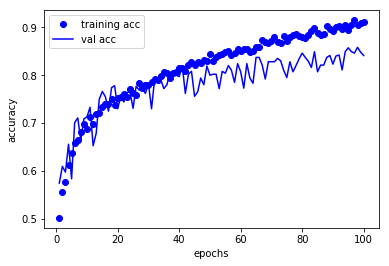

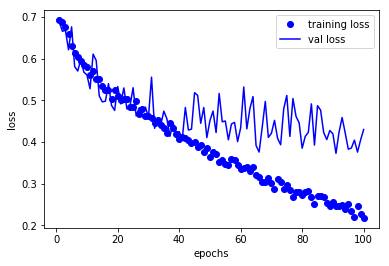

In [27]:
plot_history(hist_custom.history)

In [25]:
model.save('dogscats_regularized_custom.h5')